In [3]:
# set cwd and solver
import os
os.chdir('C:/Users/prins/GitHub/Human1_RPE-PR') 

In [4]:
import pandas as pd
from pathlib import Path
# load Lukowswki gene expression data 
Lukowski_gene_exp = pd.read_excel(Path().cwd().parent/ 'context_specific_models' / 'expression_data' / 'expression_data_Lukowski.xlsx')
# load Sysgo gene expression data 
Sysgo_gene_exp = pd.read_excel(Path().cwd().parent/ 'context_specific_models' / 'expression_data' / 'expression_data_SysGO_2020_RPE_PR.xlsx')

In [6]:
# select columns 'C10 Cone PR (%)' and Rod PR (%)' 
Lukowski_expr = Lukowski_gene_exp[['GeneSymbol','Ensembl','C10 Cone PR (%)','Average Rod PR C0, C1, C2, C3, C4, C7 (%)']]
Lukowski_expr.columns = ['GeneSymbol','Ensembl','Cone_Lukowski','Rod_Lukoswki'] # rename columns
Liang_expr = Sysgo_gene_exp[['GeneSymbol','Ensembl','ConePhotoreceptors__LiangEtAl_2019_','RodPhotoreceptors__LiangEtAl_2019_']]
Liang_expr.columns = ['GeneSymbol','Ensembl','Cone_Liang','Rod_Liang'] # rename columns

# merge Lukowski and Liang dfs
Lukowski_Liang_expr = pd.merge(Lukowski_expr, Liang_expr, on=['GeneSymbol','Ensembl'], how='inner')
# remove any rows with NaN values
Lukowski_Liang_expr_nonNaN = Lukowski_Liang_expr.dropna()
Lukowski_Liang_expr_nonNaN

,GeneSymbol,Ensembl,Cone_Lukowski,Rod_Lukoswki,Cone_Liang,Rod_Liang
1,A4GNT,ENSG00000118017,0.000000,0.000000,0.000000,0.000652
2,AAAS,ENSG00000094914,0.002994,0.002782,0.034887,0.041759
3,AACS,ENSG00000081760,0.001344,0.001137,0.117917,0.076511
5,AADAT,ENSG00000109576,0.000369,0.000563,0.020034,0.016466
6,AANAT,ENSG00000129673,0.000425,0.000385,0.117648,0.124430
...,...,...,...,...,...,...
3037,ZDHHC9,ENSG00000188706,0.000640,0.000263,0.036382,0.031007
3038,ZMPSTE24,ENSG00000084073,0.002317,0.001570,0.070642,0.072308
3039,ZNRD1,ENSG00000066379,0.003439,0.002697,0.044492,0.035282
3040,ZNRF1,ENSG00000186187,0.021722,0.000249,0.101025,0.041969


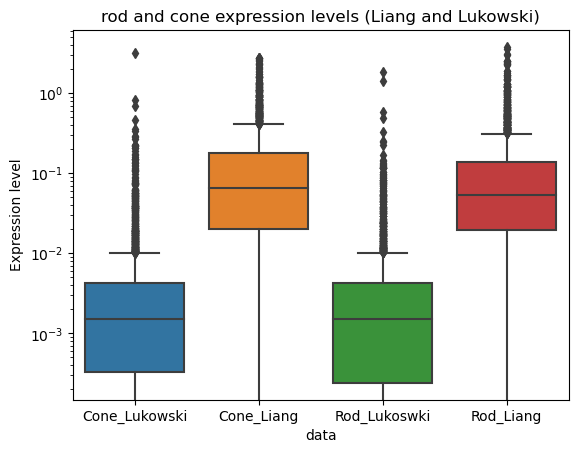

In [16]:
import seaborn as sns
# boxplots for Lukowski and Liang rods and cones
# make long dataset for boxplots
Lukowski_Liang_expr_nonNaN_long = pd.melt(Lukowski_Liang_expr_nonNaN, id_vars=['GeneSymbol','Ensembl'], value_vars=['Cone_Lukowski','Cone_Liang','Rod_Lukoswki','Rod_Liang'])
Lukowski_Liang_expr_nonNaN_long
# make boxplot
ax = sns.boxplot(x="variable", y="value", data=Lukowski_Liang_expr_nonNaN_long)
# log y scale
ax.set(yscale="log")
# add title and axis labels
ax.set_title('rod and cone expression levels (Liang and Lukowski)')
ax.set(xlabel='data', ylabel='Expression level')

# save figure in results folder using savefig
if not os.path.exists('results/Liang_vs_Lukowski'):
    os.makedirs('results/Liang_vs_Lukowski')
plt.savefig(Path().cwd()/ 'results' / 'Liang_vs_Lukowski' / 'boxplots_expression_log.png', dpi=300, bbox_inches='tight')

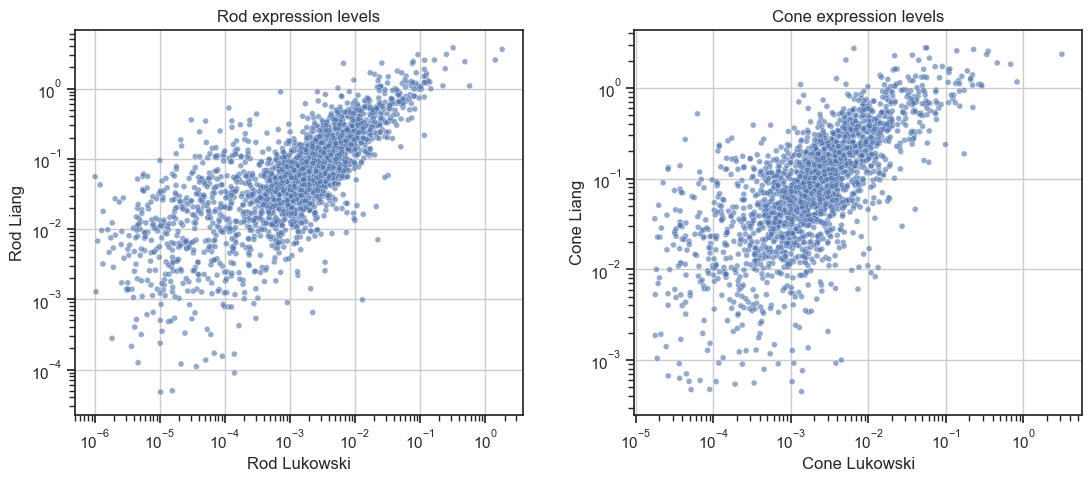

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

def make_scatterplot_expression_data(ax, x, y, xlabel, ylabel, title, xscale='log', yscale='log', alpha=0.6, size=5):
    # create scatterplot using seaborn
    sns.scatterplot(ax=ax, x=x, y=y, alpha=alpha, size=size)
    ax.set(xlabel=xlabel, ylabel=ylabel)
    ax.set(xscale=xscale, yscale=yscale)
    
    # Set log minor ticks
    ax.xaxis.set_minor_locator(LogLocator(base=10.0, subs='all'))
    ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs='all'))

    ax.grid(True, which='major')  # Grid for both major and minor ticks
    ax.tick_params(axis='x', which='both', bottom=True, labelbottom=True)
    ax.tick_params(axis='y', which='both', left=True, labelleft=True)
    
    ax.get_legend().remove()
    ax.set_title(title)


# subplots for Lukowski and Liang rods and cones
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

# plot Lukowski rods vs Liang rods scatterplot
make_scatterplot_expression_data(ax=axs[0], \
    x=Lukowski_Liang_expr_nonNaN['Rod_Lukoswki'], \
    y=Lukowski_Liang_expr_nonNaN['Rod_Liang'],\
    xlabel='Rod Lukowski', ylabel='Rod Liang',\
    title='Rod expression levels')
    
# plot Lukowski rods vs Liang rods scatterplot
make_scatterplot_expression_data(ax=axs[1], \
    x=Lukowski_Liang_expr_nonNaN['Cone_Lukowski'], \
    y=Lukowski_Liang_expr_nonNaN['Cone_Liang'],\
    xlabel='Cone Lukowski', ylabel='Cone Liang',\
    title='Cone expression levels')

# increase space between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.25)

# save figure in results folder using savefig
if not os.path.exists('results/Liang_vs_Lukowski'):
    os.makedirs('results/Liang_vs_Lukowski')
plt.savefig(Path().cwd()/ 'results' /  'Liang_vs_Lukowski' / 'scatterplots_expression.png', dpi=300, bbox_inches='tight')

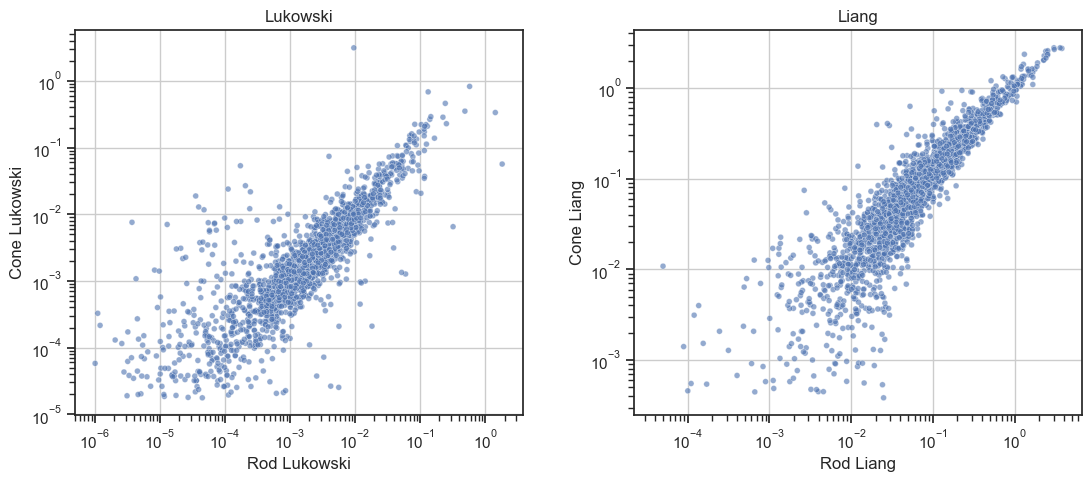

In [164]:
###### RODS VS CONES ######

# plot Lukowski (0) and Liang (1) rods vs cones scatterplot
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

# plot Lukowski rods vs Liang rods scatterplot
make_scatterplot_expression_data(ax=axs[0], \
    x=Lukowski_Liang_expr_nonNaN['Rod_Lukoswki'], \
    y=Lukowski_Liang_expr_nonNaN['Cone_Lukowski'],\
    xlabel='Rod Lukowski', ylabel='Cone Lukowski',\
    title='Lukowski')

# plot Lukowski rods vs Liang rods scatterplot
make_scatterplot_expression_data(ax=axs[1], \
    x=Lukowski_Liang_expr_nonNaN['Rod_Liang'], \
    y=Lukowski_Liang_expr_nonNaN['Cone_Liang'],\
    xlabel='Rod Liang', ylabel='Cone Liang',\
    title='Liang')

# increase space between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.25)

# save figure in results folder using savefig
if not os.path.exists('results/Liang_vs_Lukowski'):
    os.makedirs('results/Liang_vs_Lukowski')
plt.savefig(Path().cwd()/ 'results' / 'Liang_vs_Lukowski' / 'scatterplots_expression_rods_vs_cones.png', dpi=300, bbox_inches='tight')

In [120]:
# load pickle Path().cwd() / 'results' / 'compare_rod_models' / 'fva_Lukowski_diff.pkl'
import pickle
with open(Path().cwd() / 'results' / 'compare_rod_models' / 'fva_Lukowski_diff.pkl', 'rb') as f:
    fva_Lukowski_diff = pickle.load(f)
df = fva_Lukowski_diff
df

,min,max,min_modified,max_modified,min_loopless,max_loopless,min_loopless_modified,max_loopless_modified,cell,lb,...,bigg.reaction,sbo,rhea,vmhreaction,kegg.reaction,name,subsystem,reaction,met_IDs,GPR
MAR06328_PR,16.65,1000.0,16.65,16.65,16.65,16.65,16.65,16.65,PR,-1000.0,...,ATPtm,SBO:0000185,"[35002, 34999]",ATPtm,R00124,ATP:ADP phosphatransferase,Transport reactions,ADP[c_PR] + ATP[m_PR] <=> ADP[m_PR] + ATP[c_PR],MAM01285c_PR + MAM01371m_PR <=> MAM01285m_PR +...,ENSG00000005022 or ENSG00000151729 or ENSG0000...
MAR05648_PR_RPE,0.00,1000.0,0.00,0.00,0.00,0.00,0.00,0.00,RPE,0.0,...,,SBO:0000185,,r1733,,,Transport reactions,alanine[c_PR] + methionine[e_RPE_PR] + Na+[e_R...,MAM01307c_PR + MAM02471e_RPE_PR + MAM02519e_RP...,ENSG00000103064 or ENSG00000103257
MAR05664_PR_RPE,0.00,1000.0,0.00,0.00,0.00,0.00,0.00,0.00,RPE,0.0,...,,SBO:0000185,,r1749,,,Transport reactions,glutamine[c_PR] + Na+[e_RPE_PR] + tryptophan[e...,MAM01975c_PR + MAM02519e_RPE_PR + MAM03089e_RP...,ENSG00000103064 or ENSG00000103257
MAR05663_PR_RPE,0.00,1000.0,0.00,0.00,0.00,0.00,0.00,0.00,RPE,0.0,...,,SBO:0000185,,r1748,,,Transport reactions,alanine[c_PR] + Na+[e_RPE_PR] + tryptophan[e_R...,MAM01307c_PR + MAM02519e_RPE_PR + MAM03089e_RP...,ENSG00000103064 or ENSG00000103257
MAR05662_PR_RPE,0.00,1000.0,0.00,0.00,0.00,0.00,0.00,0.00,RPE,0.0,...,,SBO:0000185,,r1747,,,Transport reactions,glycine[c_PR] + Na+[e_RPE_PR] + tryptophan[e_R...,MAM01986c_PR + MAM02519e_RPE_PR + MAM03089e_RP...,ENSG00000103064 or ENSG00000103257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAR05530_PR_RPE,-1000.00,1000.0,0.00,0.00,0.00,0.00,0.00,0.00,RPE,0.0,...,,SBO:0000185,,r1615,,,Transport reactions,threonine[c_PR] + tryptophan[e_RPE_PR] --> thr...,MAM02993c_PR + MAM03089e_RPE_PR --> MAM02993e_...,ENSG00000103257 or ENSG00000165029
MAR05529_PR_RPE,-1000.00,1000.0,0.00,0.00,0.00,0.00,0.00,0.00,RPE,0.0,...,,SBO:0000185,,r1614,,,Transport reactions,tryptophan[c_PR] + valine[e_RPE_PR] --> trypto...,MAM03089c_PR + MAM03135e_RPE_PR --> MAM03089e_...,ENSG00000103257 or ENSG00000165029
MAR11571_PR_RPE,-1000.00,1000.0,0.00,0.00,0.00,0.00,0.00,0.00,RPE,0.0,...,3AIBSYMPt,SBO:0000185,,3AIBSYMPt,,"3-Amino-Isobutyrate Transport, Sodium Symport",Transport reactions,L-3-amino-isobutanoate[e_RPE_PR] + 2.0 Na+[e_R...,MAM02325e_RPE_PR + 2.0 MAM02519e_RPE_PR --> MA...,
MAR05528_PR_RPE,-1000.00,1000.0,0.00,0.00,0.00,0.00,0.00,0.00,RPE,0.0,...,,SBO:0000185,,r1613,,,Transport reactions,asparagine[c_PR] + tryptophan[e_RPE_PR] --> as...,MAM01369c_PR + MAM03089e_RPE_PR --> MAM01369e_...,ENSG00000103257 or ENSG00000165029


In [102]:
Lukowski_Ensembl_GeneSymbol_dict = dict(zip(Lukowski_expr['Ensembl'], Lukowski_expr['GeneSymbol']))
Lukowski_Ensembl_GeneSymbol_dict

{nan: 'ZZZ3',
 'ENSG00000128274': 'A4GALT',
 'ENSG00000118017': 'A4GNT',
 'ENSG00000094914': 'AAAS',
 'ENSG00000081760': 'AACS',
 'ENSG00000114771': 'AADAC',
 'ENSG00000109576': 'AADAT',
 'ENSG00000129673': 'AANAT',
 'ENSG00000090861': 'AARS1',
 'ENSG00000157426': 'AASDH',
 'ENSG00000149313': 'AASDHPPT',
 'ENSG00000008311': 'AASS',
 'ENSG00000183044': 'ABAT',
 'ENSG00000165029': 'ABCA1',
 'ENSG00000167972': 'ABCA3',
 'ENSG00000198691': 'ABCA4',
 'ENSG00000141338': 'ABCA8',
 'ENSG00000085563': 'ABCB1',
 'ENSG00000073734': 'ABCB11',
 'ENSG00000005471': 'ABCB4',
 'ENSG00000115657': 'ABCB6',
 'ENSG00000103222': 'ABCC1',
 'ENSG00000121270': 'ABCC11',
 'ENSG00000023839': 'ABCC2',
 'ENSG00000108846': 'ABCC3',
 'ENSG00000125257': 'ABCC4',
 'ENSG00000114770': 'ABCC5',
 'ENSG00000006071': 'ABCC8',
 'ENSG00000069431': 'ABCC9',
 'ENSG00000101986': 'ABCD1',
 'ENSG00000173208': 'ABCD2',
 'ENSG00000117528': 'ABCD3',
 'ENSG00000160179': 'ABCG1',
 'ENSG00000118777': 'ABCG2',
 'ENSG00000138075': 'ABCG5'

In [96]:
# in Liang_expr, find Rod_Liang values and make dict matching Ensembl and geneSymbol to values
Liang_Ensembl_Rod_dict = dict(zip(Liang_expr['Ensembl'], [Liang_expr['Rod_Liang'], Liang_expr['GeneSymbol']]))
Liang_Ensembl_Rod_dict
# get first entry in dict
Liang_Ensembl_Rod_dict[list(Liang_Ensembl_Rod_dict.keys())[0]]

0       0.057260
1       0.028375
2       0.053895
3       0.433891
4       0.075443
          ...   
3038    0.003890
3039         NaN
3040         NaN
3041    0.101018
3042    0.008079
Name: Rod_Liang, Length: 3043, dtype: float64